<a href="https://colab.research.google.com/github/Orley74/ML_projects_python/blob/main/Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dane wrzuciłem na github aby można było je pobrać i wykorzystać w środowisku google colab

In [275]:
!git clone https://github.com/Orley74/Mandrill.git
!pip install langdetect
!python -m spacy download en_core_web_sm
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
import spacy
from langdetect import detect
import string


fatal: destination path 'Mandrill' already exists and is not an empty directory.
2024-01-15 14:58:06.560303: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 14:58:06.560387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 14:58:06.562327: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 14:58:08.283857: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.l

Funkcja wykrywająca język, jeżeli funckja zwróci, może ona wykrywać języki:
af, ar, bg, bn, ca, cs, cy, da, de, el, en, es, et, fa, fi, fr, gu, he,
hi, hr, hu, id, it, ja, kn, ko, lt, lv, mk, ml, mr, ne, nl, no, pa, pl,
pt, ro, ru, sk, sl, so, sq, sv, sw, ta, te, th, tl, tr, uk, ur, vi, zh-cn, zh-tw

w przypadku innego języka wysąpi błąd, więc będziemy traktować tekst jako język angielski

In [276]:
def text_language(data):
    try:
        language = detect(data)
    except:
        return 'en'
    return language

Teraz zdefiniuję funkcje preprocesu textu, która usuwa znaki interpunkcyjne i sprowadza słowa do lemanów

In [277]:
nlp = spacy.load("en_core_web_sm")
def preprocess(text, lang='en'):

  for text in text:
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()

    tokens = nlp(text)
    tokens = " ".join([token.lemma_ for token in tokens])

  return tokens

print(preprocess("Hello[]\] i am tired"))

d


Przypisuję dane z pliku excel do zmiennej excel data, jako że plik zawiera arkusze dla obu wywołuję funkcję wykrywającą język i stosuję lematyzację.

In [278]:
# print()
data = pd.read_excel(os.path.join(os.path.curdir,"Mandrill/Mandril.xlsx"), sheet_name=None)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Po wyswietleniu danych widac ze jest to dict o indexach 'dot. aplikacji Mandrill' i 'dot. innych'

In [279]:
data

{'dot. aplikacji Mandrill':                                                   Post
 0    [blog] Using Nullmailer and Mandrill for your ...
 1    [blog] Using Postfix and free Mandrill email s...
 2    @aalbertson There are several reasons emails g...
 3    @adrienneleigh I just switched it over to Mand...
 4    @ankeshk +1 to @mailchimp We use MailChimp for...
 ..                                                 ...
 145  We've simplified and reduced pricing for every...
 146  We’re Unifying Your Mandrill and MailChimp Dat...
 147  Whaaat, I didn't know @MailChimp had an email ...
 148  would like to send emails for welcome, passwor...
 149  Zapier Makes Mandrill Integration Easy | Mandr...
 
 [150 rows x 1 columns],
 'dot. innych':                                                   Post
 0                ¿En donde esta su remontada Mandrill?
 1    .@Katie_PhD Alternate, 'reproachful mandrill' ...
 2    .@theophani can i get "drill" in there? it wou...
 3    “@ChrisJBoyland: Baby Mandril

Dla kazdego z tych danych wywoluje funkcje przygotowane wczesniej, dzieki pandas moge uzyc tych funkcji dla kazdego wiersza przy pomocy metody apply dla pandas dataframe

In [280]:
for category in data:
    data[category]['Language'] = data[category]['Post'].apply(text_language)
    data[category]['Leman'] = data[category].apply(lambda row: preprocess([row['Post']], row['Language']), axis=1)


Wyswietlam zlematyzowane dane

In [281]:
data['dot. aplikacji Mandrill']['Leman']

0      blog use nullmailer and mandrill for your ubun...
1      blog use postfix and free mandrill email servi...
2      aalbertson there be several reason email go to...
3      adrienneleigh I just switch it over to mandril...
4      ankeshk 1 to mailchimp we use mailchimp for ma...
                             ...                        
145    we ve simplify and reduced pricing for everyon...
146    we ’re unify your mandrill and mailchimp data ...
147    whaaat I do not know mailchimp have an email d...
148    would like to send email for welcome password ...
149    zapier make mandrill integration easy   mandri...
Name: Leman, Length: 150, dtype: object

Łączę oba zbiory danych tworząc jeden i przypisuje im dodatkowo wartości 0 - dla dot. innych i 1 - dla aplikacji Mandrill

In [282]:
len_mandrill = len(data['dot. aplikacji Mandrill'])
len_inne = len(data['dot. innych'])
print(len_mandrill,len_inne)

all_data = pd.concat([data['dot. aplikacji Mandrill'], data['dot. innych']])
all_data['Category'] = [1] * len_mandrill + [0] * len_inne

150 150


In [283]:
print(all_data['Leman'])

0      blog use nullmailer and mandrill for your ubun...
1      blog use postfix and free mandrill email servi...
2      aalbertson there be several reason email go to...
3      adrienneleigh I just switch it over to mandril...
4      ankeshk 1 to mailchimp we use mailchimp for ma...
                             ...                        
145    why be monkey butts so colorful mandrill wikim...
146    you can now experience the thrill of classic p...
147    ジャンルごった煮のバンド、mandrillの75年作！オススメはoddiseeがサンプリング...
148    パーカッシヴなビートに重厚なベースやスペイシーなシンセ等が絡むb1が ◎ な80年の好作！シ...
149    最近ではnottz feat pete rock   turn it upでも使われていたレ...
Name: Leman, Length: 300, dtype: object


Stworzenie obiektu TF-IDF Vectorizer, TF - term frequency IDF - unikalność słowa w korpusie tekstu TF/len(korpus),macierz TF-IDF powstaje w wyniku pomnożenia tych wartości.
Dane są w postaci listy więc muszę ustawić tokenizer, który będzie jako korpus traktował wiersz.

In [284]:
# vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
# vectorized_data = vectorizer.fit_transform(all_data['Leman'])
vectorized = CountVectorizer(tokenizer=lambda x: x)
X = vectorizer.fit_transform(all_data['Leman'])

In [285]:
all_data['Leman'] = all_data['Leman'].apply(lambda x: ''.join(x))
print(all_data['Leman'])
count_vectorizer = CountVectorizer(lowercase=False)

# Przekształcenie danych na macierz binarną
binary_matrix = count_vectorizer.fit_transform(all_data['Leman'])



0      blog use nullmailer and mandrill for your ubun...
1      blog use postfix and free mandrill email servi...
2      aalbertson there be several reason email go to...
3      adrienneleigh I just switch it over to mandril...
4      ankeshk 1 to mailchimp we use mailchimp for ma...
                             ...                        
145    why be monkey butts so colorful mandrill wikim...
146    you can now experience the thrill of classic p...
147    ジャンルごった煮のバンド、mandrillの75年作！オススメはoddiseeがサンプリング...
148    パーカッシヴなビートに重厚なベースやスペイシーなシンセ等が絡むb1が ◎ な80年の好作！シ...
149    最近ではnottz feat pete rock   turn it upでも使われていたレ...
Name: Leman, Length: 300, dtype: object


Dziele zbiór na testowy i treningowy w proporcji 70% treningowy i 30% testowy, random_state działa jak seed czyli losuje zawsze taki sam zbiór

In [286]:
x_train, x_test, y_train, y_test = train_test_split(binary_matrix, all_data['Category'], test_size=0.3, random_state=123)


Tworzę model naiwnego klasyfikatora Bayesa i trenuję go danymi uczącymi, niestety scikit-learn nie zapisuje historii uczenia jak np. Tensorflow, dlatego nie mogę wyświetlić statystyk uczenia

In [287]:
model = sklearn.naive_bayes.MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

Sprawdzam model na zbiorze testowym

Parametry modelu:
Accuracy:  83.33 %
Confusion Matrix:
0:
 True:  35 	False:  2
1:
 True:  40 	False:  13


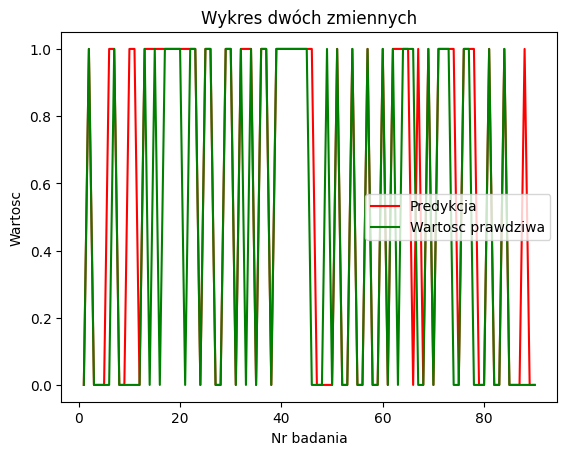

In [288]:
predictions = model.predict(x_test)
i = 0
for x,y in zip(predictions,y_test):
  if x==y:
    i+=1
print("Parametry modelu:")
print("Accuracy: ",round(i/x_test.shape[0]*100,2),"%")
conf_matrix = sklearn.metrics.confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print('0:\n True: ',conf_matrix[0][0], '\tFalse: ', conf_matrix[1][0])
print('1:\n True: ',conf_matrix[1][1], '\tFalse: ', conf_matrix[0][1])

import matplotlib.pyplot as plt

x = [i+1 for i in range(x_test.shape[0])]
plt.plot(x, predictions, label='Predykcja', color='red')

plt.plot(x, y_test, label='Wartosc prawdziwa', color='green')

plt.title('Wykres dwóch zmiennych')
plt.xlabel('Nr badania')
plt.ylabel('Wartosc')

plt.legend()

plt.show()



Łatwo można zauważyć, że model częściej klasyfikuje posty niedotyczące mandril do tych zawierających, niż odwrotnie. Jest to dobra rzecz bo prawdopodobieństwo tego, że interesująca nas wiadomość zostanie odrzucona przez model jest mniejsze. Lepiej aby działało to w ten sposób i przy weryfikacji wyników będzie można odrzucić niepasujące dane.

Naiwny klasyfikator Bayesa poradził sobie całkiem dobrze z problemem, skuteczność przewidywań wyniosła 83%.